In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\ravi\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df = pd.get_dummies(df)
df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,1,0


# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_time0bk', 'koi_slogg', 'koi_srad', 'ra','dec','koi_kepmag']]

In [5]:
df["koi_disposition_CANDIDATE"]

0       0
1       0
2       0
3       0
4       0
       ..
6986    0
6987    0
6988    1
6989    0
6990    0
Name: koi_disposition_CANDIDATE, Length: 6991, dtype: uint8

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
#X = df.drop("koi_disposition", axis=1)
X = selected_features
y = df["koi_disposition_CANDIDATE"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6991, 7) (6991, 1)


In [7]:
print(X)

      koi_period  koi_time0bk  koi_slogg  koi_srad         ra        dec  \
0      54.418383   162.513840      4.467     0.927  291.93423  48.141651   
1      19.899140   175.850252      4.544     0.868  297.00482  48.134129   
2       1.736952   170.307565      4.564     0.791  285.53461  48.285210   
3       2.525592   171.595550      4.438     1.046  288.75488  48.226200   
4       4.134435   172.979370      4.486     0.972  296.28613  48.224670   
...          ...          ...        ...       ...        ...        ...   
6986    8.589871   132.016100      4.296     1.088  298.74921  46.973351   
6987    0.527699   131.705093      4.529     0.903  297.18875  47.093819   
6988    1.739849   133.001270      4.444     1.031  286.50937  47.163219   
6989    0.681402   132.181750      4.447     1.041  294.16489  47.176281   
6990    4.856035   135.993300      4.385     1.193  297.00977  47.121021   

      koi_kepmag  
0         15.347  
1         15.436  
2         15.597  
3         1

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [9]:
X_train.head()

,koi_period,koi_time0bk,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,6.768901,133.077240,4.327,1.125,294.40472,39.351681,14.725
6370,0.733726,132.020050,4.578,0.797,284.50391,42.463860,15.770
2879,7.652707,134.460380,4.481,0.963,295.50211,38.983540,13.099
107,7.953547,174.662240,4.536,0.779,291.15878,40.750271,15.660
29,4.959319,172.258529,4.359,1.082,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data


from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

k: 1, Train/Test Score: 1.000/0.661
k: 3, Train/Test Score: 0.833/0.704
k: 5, Train/Test Score: 0.789/0.723
k: 7, Train/Test Score: 0.774/0.737
k: 9, Train/Test Score: 0.770/0.747
k: 11, Train/Test Score: 0.765/0.753
k: 13, Train/Test Score: 0.766/0.752
k: 15, Train/Test Score: 0.759/0.756
k: 17, Train/Test Score: 0.756/0.757
k: 19, Train/Test Score: 0.756/0.757


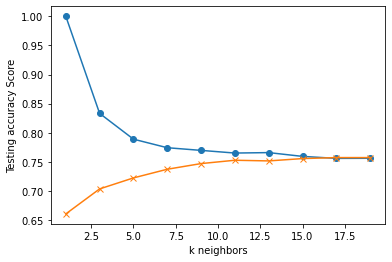

In [12]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train.ravel())
    train_score = knn.score(X_train_minmax, y_train.ravel())
    test_score = knn.score(X_test_minmax, y_test.ravel())
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Train the Model



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
# Create the GridSearchCV model
from sklearn.svm import SVC 
model = SVC(kernel='linear')

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [14]:
# Train the model with GridSearch
grid.fit(X_train_minmax, y_train.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.756, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.757, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.757, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.757, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.757, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.756, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.757, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.757, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.757, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    9.3s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.0005, 0.001]},
             verbose=3)

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.7566279044382509


In [16]:
predictions = grid.predict(X_test)
print('Test Acc: %.3f' % grid.score(X_test, y_test))

Test Acc: 0.765


# Save the Model

In [17]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'grid_search2.sav'
joblib.dump(grid, filename)

['grid_search2.sav']